# Big Data Project

In this project I am going to use various machine learning methods in order to classify companies on defaulters and non-defaulters.

Through this analysis I will implement both **parametric** models such as an LDA, QDA Logistic Regression and Linear Regression and **non-parametric** models such as decision trees and RandomForest.

## 1. Data Manipulation

To beging our analysis we first have to import the necessary libraries along with the dataset (imported from Kaggle website)

In [5]:
#import libraries
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

random_state = 42

In [6]:
#import american_bankruptcy data
path_file = r'C:\Users\User\Desktop\Imperial Reading Material\Spring Term\Big Data I\BigData Assignment\american_bankruptcy.csv'
df = pd.read_csv(path_file)

In [7]:
df

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,C_8971,alive,2014,233.211,43.338,14.094,45.615,3.376,25.261,22.846,...,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,C_8971,alive,2015,105.559,59.184,42.592,202.133,2.288,129.688,54.611,...,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,C_8971,alive,2016,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,...,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,C_8971,alive,2017,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,...,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713


**Variable Name	Description**  
**X1** Current assets: All assets expected to be sold or used in standard business operations over the next year  
**X2**	Cost of goods sold: Total cost directly related to the sale of products  
**X3**	Depreciation and amortization: Loss of value of tangible and intangible assets over time  
**X4**	EBITDA: Earnings before interest, taxes, depreciation, and amortization; alternative measure of financial performance compared to net income  
**X5**	Inventory: Accounting of items and raw materials used in production or for sale  
**X6**	Net Income: Overall profitability after deducting expenses and costs from total revenue  
**X7**	Total Receivables: Balance of money due for delivered goods or services not yet paid by customers  
**X8**	Market value: Asset price in the marketplace, in this case, market capitalization since companies are publicly traded in the stock market  
**X9**	Net sales: Gross sales minus returns, allowances, and discounts  
**X10**	Total assets: All items of value owned by a business  
**X11**	Total Long term debt: Loans and liabilities not due within one year of the balance sheet date  
**X12**	EBIT: Earnings before interest and taxes  
**X13**	Gross Profit: Profit after subtracting costs related to manufacturing and selling products or services  
**X14**	Total Current Liabilities: Sum of accounts payable, accrued liabilities, taxes, and bonds payable at year end  
**X15**	Retained Earnings: Profit left after paying costs, taxes, and dividends to shareholders  
**X16**	Total Revenue: Total income from sales before expenses  
**X17**	Total Liabilities: Combined debts and obligations owed to external parties  
**X18**	Total Operating Expenses: Business operation expenses  
**status_label**	Bank Status: Failed or Alive (Target column)  

In [9]:
variables = df.columns[3:]
data = df[variables]

<Axes: >

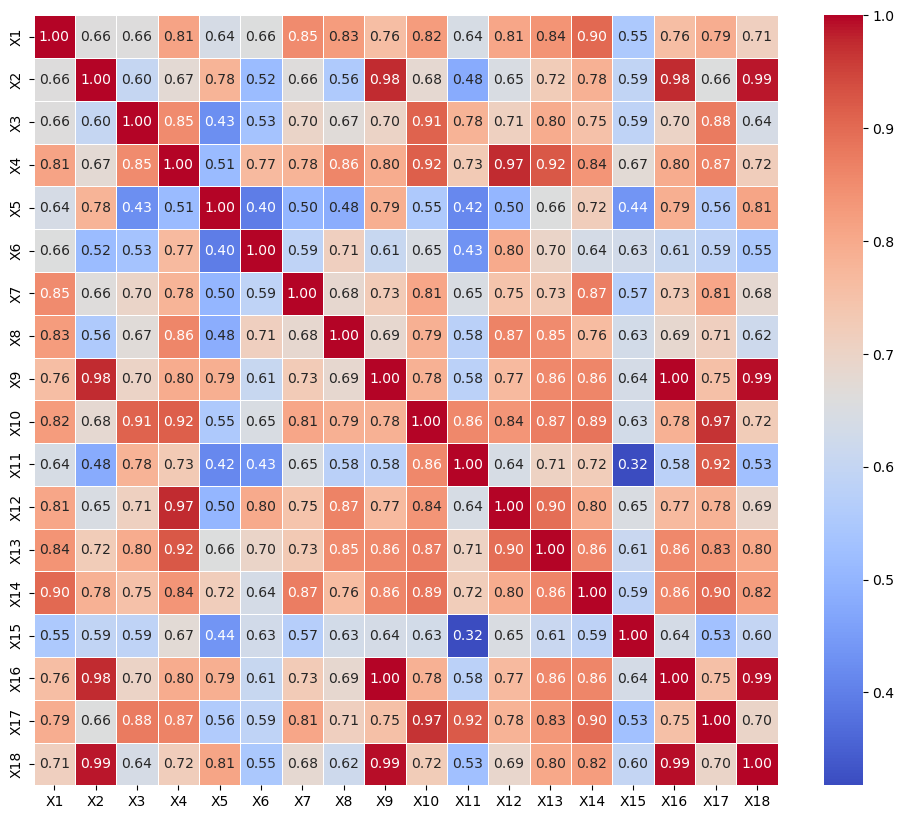

In [10]:
#plot the correlation matrix between the multiple variables

plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f' , linewidths=0.5 )

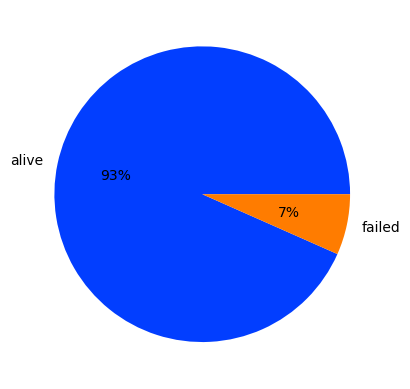

In [11]:
# Count the occurrences of each label (1 for alive, 0 for failed)
status_counts = df['status_label'].value_counts()

# Define colors for the pie chart
palette_color = sns.color_palette('bright')

# Plotting the data on the pie chart
plt.pie(status_counts, labels=status_counts.index, colors=palette_color, autopct='%.0f%%')

# Displaying the chart
plt.show()

Since the dataset is imbalance we will have to employ some statistical methods in order to make the % of defaulters and non-defaulters the same.  
The method selected is SMOTE and we will further analyze the algorithm bellow.

**SMOTE**  
SMOTE or Synthetic Minority Oversampling Technique is a technique used in machine learning in order to mitigate problems that may arise from using imbalanced datasets.

Specifically, if one were to train their model one the initial data, they would risk getting extremely accurate in-sample scores by simply predicting that each dependent variable is of class k. In reality however this is not particularly usefull since, the overall goal is to predict the defaulters as accurately as possible.

In [14]:
#change the status_label to 1 for alive and 0 for failed
df['status_label'] = df['status_label'].map({'alive': 1, 'failed': 0})
X = df.drop(columns=['company_name', 'status_label'])
y = df['status_label']

**ROC-AUC Precission-Recall**  
Before we proceed with any model estimation it is important to state various methods to evaluate the performance of our models

Specifically, some of the most common ones are the ROC - AUC graph, and the Precission-Recall to determine the accuracy of the model  
Bellow we define various functions that will later be used in all of our models to evaluate their performance


In [16]:
#define confusion matrix
def confusion_matrix(model, X_test, y_test):
    global cm
    #perform OOS prediction
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import ConfusionMatrixDisplay
    
    
    pred = model.predict(X_test)
    ac = accuracy_score(pred, y_test)
    print(f'The out-of-sample score is {ac}')
    #I obtain the confusion matrix
    cm = confusion_matrix(y_test, pred)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

In [17]:
#define precision-recall
def precision_recall(cm):
    precision = cm[1][1] / (cm[1][1] + cm[0][1])
    recall = cm[1][1] / (cm[1][1] + cm[1][0])
    print(f'Precision {precision}')
    print(f'Recall {recall}')

In [18]:
#define roc_auc_curve
def roc_auc_curve(model, X_test, y_test):
    from sklearn.metrics import roc_curve, roc_auc_score
    import matplotlib.pyplot as plt
    
    #model.predict_proba() returns probabilities for both classes, take probability for class 1
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    #Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    #Calculate AUC
    auc_score = roc_auc_score(y_test, y_pred_prob)
    print(f'AUC: {auc_score}')
    
    #Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guess
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

## 2. Parametric Models

In classification problems idealy we would want to use the Bayes classifier in order to classify our dataset. In reality however we can not simply use the Bayes classifier since we do not know the distribution of Y given X or P(Y=k) and P(X=x|Y=k).  
Parametric models overcome this problem by making certain assumptions about the distributions of the underlying data.

In [21]:
#split the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, shuffle = False, random_state = random_state)

In [22]:
#SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=random_state)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_res))

Resampled dataset shape Counter({1: 51465, 0: 51465})


In [23]:
#X_train_res.drop(columns={'year'}, inplace = True)
#X_test.drop(columns={'year'}, inplace = True)

In [24]:
#Initialize KFold CV
from sklearn.model_selection import KFold
n_splits = 5
shuffle=True
cv = KFold(n_splits=n_splits, random_state=random_state, shuffle = shuffle)

### 2.1 Linear Discriminant Analysis

One of the most common used parametric models is the Linear Discriminant Analysis - LDA model

Assumptions  
- P(Y=k) is proportional to the training observations that belong to the kth class  
- P(X=x|Y=k) is Gaussian (Normaly Distributed) with a constant mean and variance across classes K
- The covariance matrix of each feature is the same

In [27]:
#perform LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()
model.fit(X_train_res, y_train_res)

LinearDiscriminantAnalysis()

In [28]:
scores = []
for train_index, test_index in cv.split(X_train_res):
    # Create the Training and Test sets
    X_train_cv, X_test_cv = X_train_res.iloc[train_index], X_train_res.iloc[test_index]
    y_train_cv, y_test_cv = y_train_res.iloc[train_index], y_train_res.iloc[test_index]
    
    # Fit the model
    model.fit(X_train_cv, y_train_cv) 
    scores.append(model.score(X_test_cv, y_test_cv))
print(f'Mean score of K-Fold CV: {np.mean(scores)}')

Mean score of K-Fold CV: 0.6163994948022928


The out-of-sample score is 0.6935395043423004


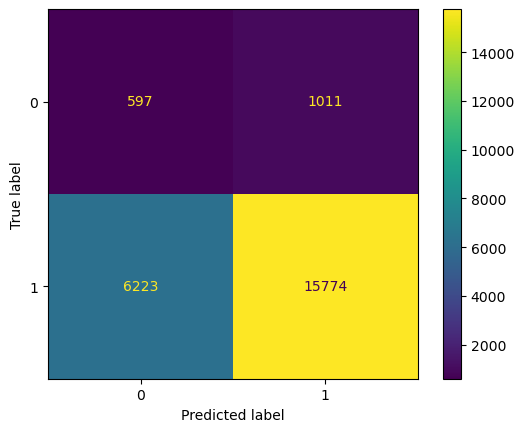

In [29]:
#calculate confusion matrix
confusion_matrix(model = model, X_test = X_test, y_test = y_test) #we specified earlier the model as LDA()

In [30]:
#calculate precision-recall
precision_recall(cm)

Precision 0.9397676496872207
Recall 0.7170977860617357


AUC: 0.601786296276946


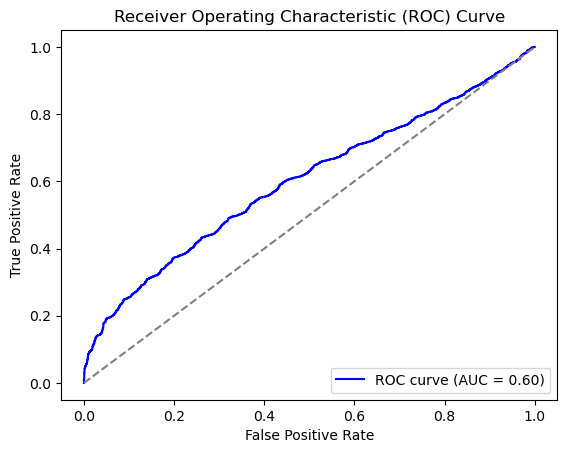

In [31]:
roc_auc_curve(model, X_test, y_test)

### 2.2 Quadratic Discriminant Analysis

One of the most common used parametric models is the Quadratic Discriminant Analysis - QDA model

Assumptions  
- Data follow Gaussian distribution  
- The covariance matrix of each feature is different (gives more flexibility)

In [34]:
#perform QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 

model_qda = QuadraticDiscriminantAnalysis()
model_qda.fit(X_train_res, y_train_res)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [35]:
scores = []
for train_index, test_index in cv.split(X_train_res):
    # Create the Training and Test sets
    X_train_cv, X_test_cv = X_train_res.iloc[train_index], X_train_res.iloc[test_index]
    y_train_cv, y_test_cv = y_train_res.iloc[train_index], y_train_res.iloc[test_index]
    
    # Fit the model
    model_qda.fit(X_train_cv, y_train_cv) 
    scores.append(model_qda.score(X_test_cv, y_test_cv))
print(f'Mean score of K-Fold CV: {np.mean(scores)}')

C:\Users\User\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\User\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\User\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\User\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Mean score of K-Fold CV: 0.522753327504129


C:\Users\User\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


The out-of-sample score is 0.09760643931370472


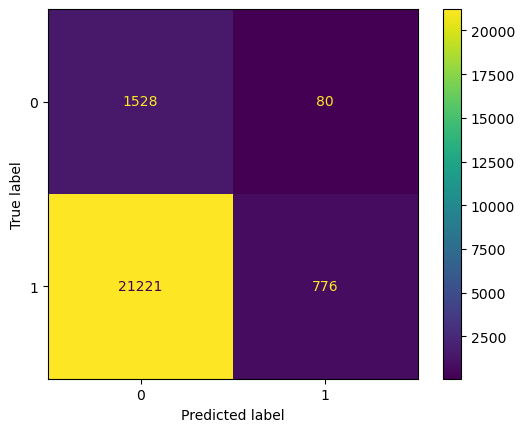

In [36]:
#calculate confusion matrix
confusion_matrix(model = model_qda, X_test = X_test, y_test = y_test) #we specified earlier the model as QDA()

In [37]:
#calculate precision-recall
precision_recall(cm)

Precision 0.9065420560747663
Recall 0.03527753784606992


AUC: 0.5329674224006575


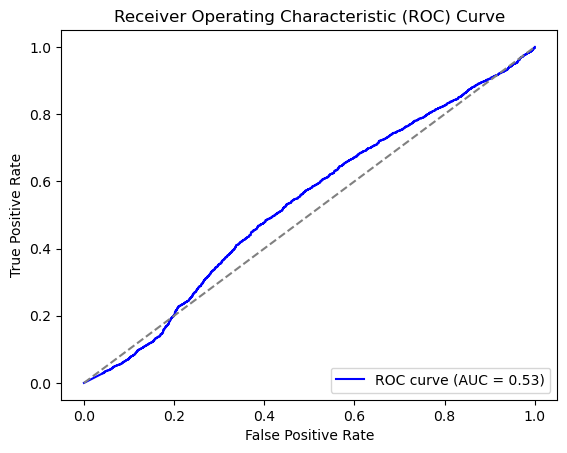

In [38]:
roc_auc_curve(model_qda, X_test, y_test)

As we can observe the performance of the QDA is quite disapointing compared to the LDA.  
 - Although one would expect QDA to overperform due to the non-linear structure, in this case it is quite the opposite. Such poor performance could be atrributed to the underlying structure of the data.
 - Specifically our data showcased multicollinearity which makes the calculation of the each covariance matrix difficult due to redundant factors.

### 2.3 Logistic Regression

Logistic Regression is a model that tries to assign different probabilities for each of our classes k.   

The model differentiates the classes based on a linear boundry (which is a hyperparameter of the model).

Some assumptions of the model are:
- log-odds of the response variable is a linear combination of the input features
- eatures are not highly correlated

In [42]:
#perform Logistic Regression
from sklearn.linear_model import LogisticRegression 

model_logistic = LogisticRegression()
model_logistic.fit(X_train_res, y_train_res)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

The out-of-sample score is 0.29591188307561955


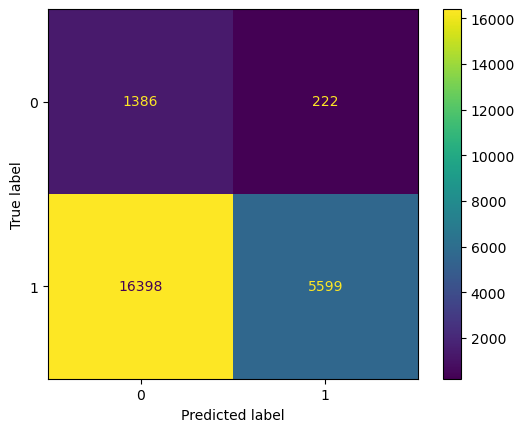

In [43]:
#calculate confusion matrix
confusion_matrix(model = model_logistic, X_test = X_test, y_test = y_test) #we specified earlier the model as logistic()

In [44]:
#calculate precision-recall
precision_recall(cm)

Precision 0.9618622229857413
Recall 0.254534709278538


AUC: 0.6572607594387023


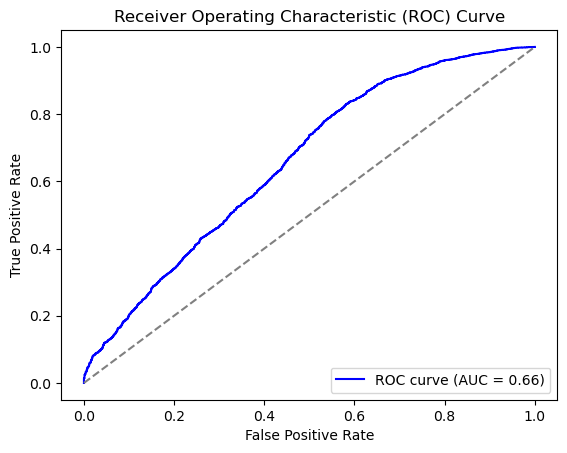

In [45]:
#calculate ROC-AUC curve
roc_auc_curve(model_logistic, X_test, y_test)

Similar to QDA, logistic regression performs poorly in correctly classifying defaulters vs non-defaulters given the specific parameters.  
One solution could be to perform regularization/feature selection to identify the most important variables in the dataset and thus get rid of the redundant variables

### 2.4 Linear Regression

In classification Linear Regression is a model that predicts weather a 

The model the differentiates the classes based on a linear boundry (which is a hyperparameter of the model).

Some assumptions of the model are:

log-odds of the response variable is a linear combination of the input features
eatures are not highly correlated

In [49]:
#perform Linear Regression
from sklearn.linear_model import LinearRegression 

model_linear = LinearRegression()
model_linear.fit(X_train_res, y_train_res)

LinearRegression()

In [50]:
from sklearn.metrics import accuracy_score
scores = []
for train_index, test_index in cv.split(X_train_res):
    # Create the Training and Test sets
    X_train_cv, X_test_cv = X_train_res.iloc[train_index], X_train_res.iloc[test_index]
    y_train_cv, y_test_cv = y_train_res.iloc[train_index], y_train_res.iloc[test_index]

    pred_linear = model_linear.predict(X_train_cv)
    pred_linear[pred_linear>=0.5] = 1
    pred_linear[pred_linear<0.5] = 0
    
    # Fit the model
    from sklearn.metrics import accuracy_score
    scores.append(accuracy_score(pred_linear,y_train_cv))
print(f'Mean score of K-Fold CV: {np.mean(scores)}')

Mean score of K-Fold CV: 0.6163994948022928


In [51]:
#define confusion matrix for the linear regression model
def confusion_matrix_linear(model, X_test, y_test):
    global cm
    #perform OOS prediction
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import ConfusionMatrixDisplay
    
    
    pred_linear = model_linear.predict(X_test)
    pred_linear[pred_linear>=0.5] = 1
    pred_linear[pred_linear<0.5] = 0
    
    ac = accuracy_score(pred_linear, y_test)
    print(f'The out-of-sample score is {ac}')
    #I obtain the confusion matrix
    cm = confusion_matrix(y_test, pred_linear)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

The out-of-sample score is 0.693073501376827


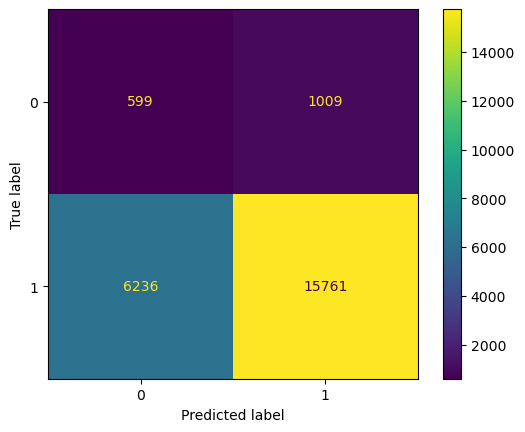

In [52]:
#calculate confusion matrix
confusion_matrix_linear(model = model_linear, X_test = X_test, y_test = y_test) #we specified earlier the model as linear()

In [53]:
#calculate precision-recall
precision_recall(cm)

Precision 0.9398330351818724
Recall 0.7165067963813248


AUC: 0.6023902626251385


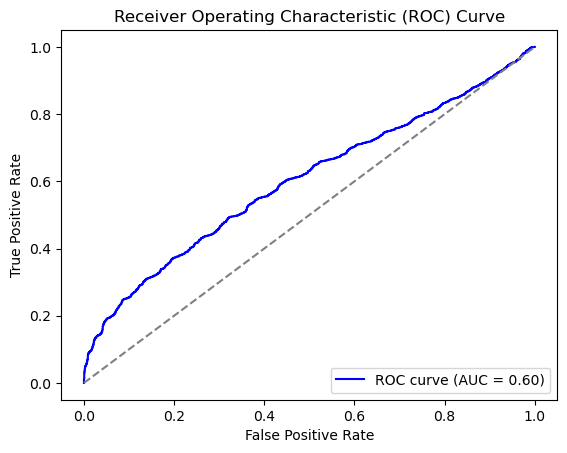

In [54]:
#define roc_auc_curve for linear regression
def roc_auc_curve_linear(model_linear, X_test, y_test):
    from sklearn.metrics import roc_curve, roc_auc_score
    import matplotlib.pyplot as plt
    
    # Use model.predict() to get continuous predictions (no probability)
    y_pred = model_linear.predict(X_test)
    
    # Compute ROC curve based on predicted values
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    
    # Calculate AUC
    auc_score = roc_auc_score(y_test, y_pred)
    print(f'AUC: {auc_score}')
    
    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guess
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Call the adjusted function for linear regression
roc_auc_curve_linear(model_linear, X_test, y_test)


## 3. Non-Parametric 

Non-parametric models do not make any specific assumptions about the underlying distribution of the dataset.

 - They are more flexible and adaptable than parametric models, as they can capture complex and irregular patterns that parametric models cannot. They also do not depend on the choice of parameters, as they use the data itself to determine the shape and form of the model.

 - Non-parametric models are more difficult to fit, interpret, and generalize than parametric models, as they require more data and computation. They can also be noisy and overfit the data, especially if there are irrelevant or redundant variables.



In [57]:
#split the dataset into training and testing - without SMOTE since non-parametric models do not need a balanced dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, shuffle = False, random_state = random_state)

### 3.1 Decision Tree

Decision trees can also be seen as nested if statements on the input features also called attributes

Algorithm:
- Start at the tree root
- Split the dataset on the attribute that results in the best information gain - **recursive binary splitting**
- Iterate the proceedure for each child node until the leaves are pure (samples at the leaves belong to the same class)

- best attribute to split
- choose threshold for the best attribute


A very deep tree is prone to overfitting   
To buid a decision tree choose (hyperparameters):
- max depth --> Limits the number of levels a tree can grow (if nan then tree will grow until it is pure or hits the min_sample_split)
  pure leaf means that it contains only one feature
- min_sample_split --> minimum number of sample required to split a node (bellow that do not split)
- max number of features --> Reduce overfitting by using a certain number of features/variables
- criterion --> entropy, gini

In [60]:
#initialize tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

model_tree = DecisionTreeClassifier()

In [61]:
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Vary the depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required to be at a leaf node
    'criterion': ['gini', 'entropy'],  # Criterion to measure the quality of a split
}

In [62]:
grid_search = GridSearchCV(estimator=model_tree, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)

In [63]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [64]:
#print the best set of parameters
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


The out-of-sample score is 0.9228553272611735


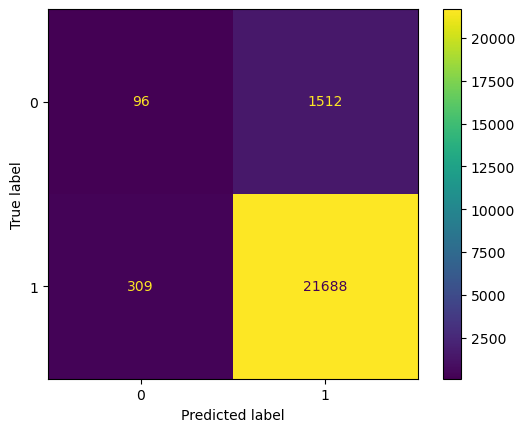

In [65]:
#define confusion matrix for the decision tree model
def confusion_matrix_linear(model, X_test, y_test):
    global cm
    #perform OOS prediction
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import ConfusionMatrixDisplay
    
    
    pred_tree = grid_search.predict(X_test)
    
    ac = accuracy_score(pred_tree, y_test)
    print(f'The out-of-sample score is {ac}')
    #I obtain the confusion matrix
    cm = confusion_matrix(y_test, pred_tree)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

#run the model
confusion_matrix_linear(model_tree, X_test, y_test)

In [66]:
#calculate precision-recall
precision_recall(cm)

Precision 0.9348275862068965
Recall 0.9859526299040778


AUC: 0.6632119327895686


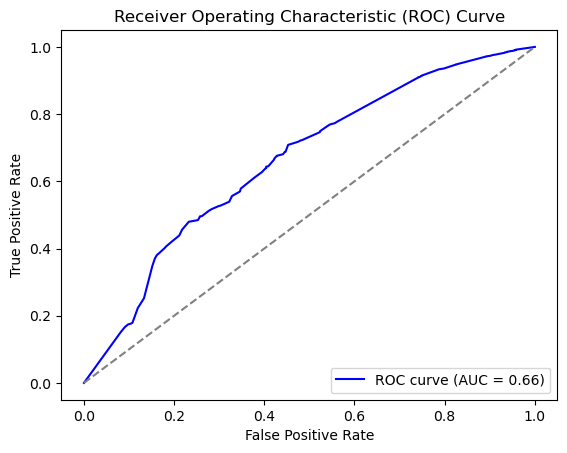

In [67]:
#define roc_auc_curve for the decision tree
def roc_auc_curve_tree(model, X_test, y_test):
    from sklearn.metrics import roc_curve, roc_auc_score
    import matplotlib.pyplot as plt
    
    # Use model.predict() to get continuous predictions (no probability)
    pred_tree = grid_search.best_estimator_.predict_proba(X_test)[:, 1] 
    
    # Compute ROC curve based on predicted values
    fpr, tpr, thresholds = roc_curve(y_test, pred_tree)
    
    # Calculate AUC
    auc_score = roc_auc_score(y_test, pred_tree)
    print(f'AUC: {auc_score}')
    
    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guess
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Call the adjusted function for linear regression
roc_auc_curve_tree(grid_search.best_estimator_, X_test, y_test)

The model can have a good precision recall, but on the same time perform poorly on the ROC-AUC threshold

So far we can see though that the Decision tree has provided some good results

### 3.2 Random Forest

Random Forest is an extention of the decision tree.

Because decision trees are prone to overfitting, a simple method to reduce the variance of our model is to introduce the concept of **prunning**.

Prunning is a technique that penalizes the tree score. Specifically after we grow the tree we select the best subtree based on the **lowest** tree score, where:      
tree score = SSR + aT  (T: #of leafs, a: Hyper parameters tunned through cross validation)

Another way to reduce overfitting is the Random Forest which is an algorithm that creates K bootstrapped trees, specifically
- Randomly choose n out of N samples **with resampling** to bootstrap K different trees.
- Grow each decision tree (from every bootstraped sample) randomly selecting d **without replacement**
- repeat K times
- Use K trees to assign class based on majority voting (if regression use average)

In [71]:
#initialize tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model_random = RandomForestClassifier()   #could tune hyper-parameters such as # of samples per tree, # of K bootstrapped trees or # of b features 

In [72]:
scores = []
for train_index, test_index in cv.split(X_train):
    # Create the Training and Test sets
    X_train_cv, X_test_cv = X_train_res.iloc[train_index], X_train_res.iloc[test_index]
    y_train_cv, y_test_cv = y_train_res.iloc[train_index], y_train_res.iloc[test_index]
    
    # Fit the model
    model_random.fit(X_train_cv, y_train_cv) 
    scores.append(model_random.score(X_test_cv, y_test_cv))
print(f'Mean score of K-Fold CV: {np.mean(scores)}')

Mean score of K-Fold CV: 0.9399749285568534


The out-of-sample score is 0.9314975640754077


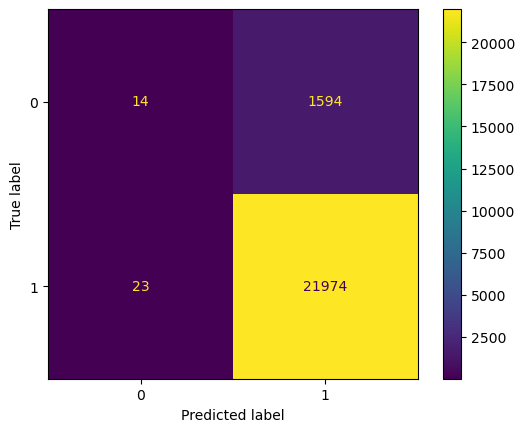

In [73]:
#calculate confusion matrix
confusion_matrix(model = model_random, X_test = X_test, y_test = y_test) #we specified earlier the model as random forest()

In [74]:
#calculate precision-recall
precision_recall(cm)

Precision 0.9323659198913782
Recall 0.9989544028731191


AUC: 0.7438898836725134


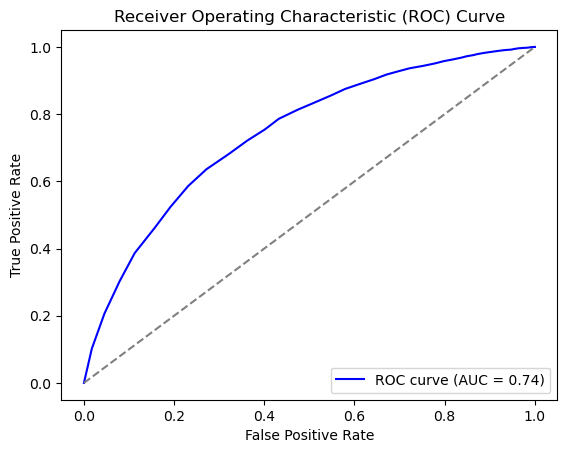

In [75]:
#calculate ROC-AUC curve
roc_auc_curve(model_random, X_test, y_test)

Based on the above results we can clearly see that random forest is a powerfull model. By using bootstrap aggregation we can clearly reduce the amount of variance that exists in an overfitted tree.

### 3.3 Neural Network

Neural Networs are powerful models that can be used for both classification and regression purposes.

Their main structure is composed of neurons that take as an input prior information from other neurons and create an output that will passed on to the network. The network can be shallow with only one hidden layer or deep with multiple layers within. 

Each neuron has an activation function which essentially determines if the node will be activated or not, making the model non-linear and reducing the overall bias.

The model starts with the input layer where each variable is initialized. From there on each neuron takes an input of the form y = wX + b. The output will be σ(y = wX + b), where σ() is the sigmoid function = $ \frac{1}{1 + e^{-x}} $. Instead of the sigmoid function we could use other types of activation functions such as the Relu or softplus fuctions. 

In order to train a neural network we have to to introduce the concept of forward, backpropagation and gradient descent.
- Forward propagation is basically a passthrough of the input data through the whole dataset
- Backpropagation is the backward update of each weight and bias of the network based on the cost function of our network.
  Each individual component is computed through the chain rule, which calculates the gradient ∇$w^{l}$ = $δ^{l}$ *$(a^{l-1})^{T}$  
      - $δ^{l}$ is the amount by with the weight is updated  
      - $(a^{l-1})^{T}$ is the output of the activation function of hidden layer l
- Gradient descent algorithm: $w^{l+1}$ = $w^{l+1}$ - h*∇$w^{l}$, where h is the learning rate
  



In [79]:
# import necessary libraries
from tensorflow.keras.models import Sequential #to define a stack of layers
from tensorflow.keras.layers import Dense, Input #the dense layer and the input 

model = Sequential()
model = Sequential()
V = 19  # Number of features
model.add(Input(shape=(V,)))
model.add(Dense(38, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [80]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 38)             │           760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │           351 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
N_epochs = 20 # Number of epochs
M = 64 # batch size

In [82]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

In [83]:
#
history = model.fit(X_train_res, y_train_res, epochs = N_epochs, batch_size = M, validation_split = 0.3)

Epoch 1/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.6492 - loss: 25.8240 - val_acc: 0.2360 - val_loss: 12.1463
Epoch 2/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.6494 - loss: 4.7614 - val_acc: 0.0087 - val_loss: 34.6219
Epoch 3/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.6509 - loss: 4.4123 - val_acc: 0.0363 - val_loss: 13.9643
Epoch 4/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.6586 - loss: 2.4629 - val_acc: 0.1530 - val_loss: 11.4951
Epoch 5/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.6581 - loss: 2.9888 - val_acc: 0.2037 - val_loss: 7.6548
Epoch 6/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.6688 - loss: 2.1562 - val_acc: 0.2584 - val_loss: 2.4089
Epoch 7/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.6576 - loss: 2.4426 - val_acc: 0.7375 - val_loss: 7.1927
Epoch 8/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.6682 - loss: 2.3252 - val_acc: 0.1253 - val_loss: 4.6596
Epoch 9/20
1126/1126 ━━━━━━━━━━━━━━

In [84]:
pred_nn = model.predict(X_test)

738/738 ━━━━━━━━━━━━━━━━━━━━ 1s 952us/step


In [85]:
pred_nn = pd.DataFrame(pred_nn)
pred_nn.rename(columns={'0':'output'}, inplace = True)
pred_nn[pred_nn>=0.5] = 1
pred_nn[pred_nn<0.5] = 0

In [86]:
ac = accuracy_score(y_test, pred_nn)
ac

0.9130692649862318

In [87]:
#define confusion matrix for the linear regression model
def confusion_matrix_neural_net(model, X_test, y_test):
    global cm
    #perform OOS prediction
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import ConfusionMatrixDisplay
    
    
    pred_nn = model.predict(X_test)
    pred_nn[pred_nn>=0.5] = 1
    pred_nn[pred_nn<0.5] = 0
    
    ac = accuracy_score(pred_nn, y_test)
    print(f'The out-of-sample score is {ac}')
    #I obtain the confusion matrix
    cm = confusion_matrix(y_test, pred_nn)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

738/738 ━━━━━━━━━━━━━━━━━━━━ 1s 914us/step
The out-of-sample score is 0.9130692649862318


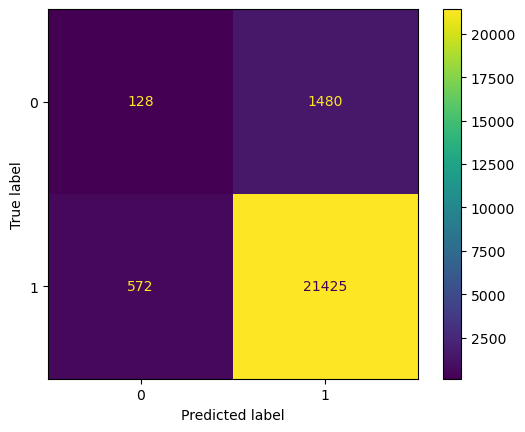

In [88]:
#calculate confusion matrix
confusion_matrix_neural_net(model = model, X_test = X_test, y_test = y_test) #we specified earlier the model as linear()

In [89]:
#calculate precision-recall
precision_recall(cm)

Precision 0.9353852870552282
Recall 0.9739964540619175


738/738 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step
AUC: 0.6720541889814463


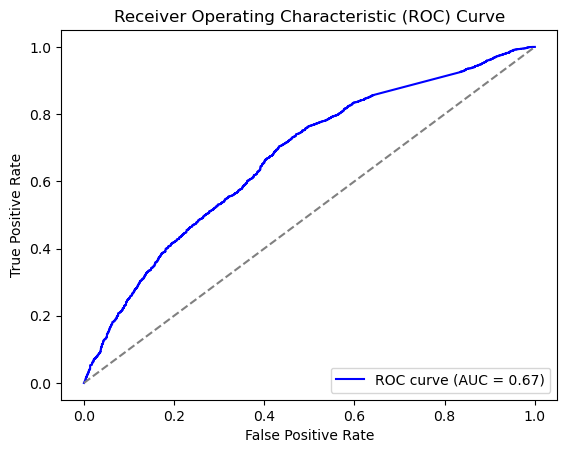

In [90]:
#define roc_auc_curve for linear regression
def roc_auc_curve_neural_net(model, X_test, y_test):
    from sklearn.metrics import roc_curve, roc_auc_score
    import matplotlib.pyplot as plt
    
    # Use model.predict() to get continuous predictions (no probability)
    y_pred = model.predict(X_test)
    
    # Compute ROC curve based on predicted values
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    
    # Calculate AUC
    auc_score = roc_auc_score(y_test, y_pred)
    print(f'AUC: {auc_score}')
    
    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guess
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Call the adjusted function for linear regression
roc_auc_curve_neural_net(model, X_test, y_test)


As expected, this simple neural network is also able to perform quite well, with both the ROC-AUC and the accuracy score being quite high

## 4. Conclusions

We can clearly observe that in general all models where able to capture meaningful patterns in the data.  
In general non-parametric models outperformed parametric ones. This can be attributed to a number of factors such as not making general assumptions about the distribution of the data.

- The overall best models was the random forest with an out-of-sample accuracy score of 0.931 and a ROC-AUC of 74.
- On the other hand the worse model was the Quadratic Discriminant analysis with an out-of-sample accuracy score of 0.52 and an ROC-AUC of aroud 0.52.  
  This can be attributed to the fact that there must exist multicolinearity in the data, making some of the assumptions of QDA non-justifiable.